In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2023-04-17 18:42:50.584169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch06/listings.csv'
data = pd.read_csv(url)

In [23]:
len(data.columns)

16

In [10]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [11]:
data = data[['property_type','room_type',
         'bathrooms','bedrooms','beds','bed_type',
         'accommodates','host_total_listings_count',
         'number_of_reviews','review_scores_value',
         'neighbourhood_cleansed','cleaning_fee',
         'minimum_nights','security_deposit',
         'host_is_superhost','instant_bookable',
         'price']]

In [14]:
len(data.columns)

17

In [18]:
data.isnull().sum()

property_type                   3
room_type                       0
bathrooms                      14
bedrooms                       10
beds                            9
bed_type                        0
accommodates                    0
host_total_listings_count       0
number_of_reviews               0
review_scores_value           821
neighbourhood_cleansed          0
cleaning_fee                 1107
minimum_nights                  0
security_deposit             2243
host_is_superhost               0
instant_bookable                0
price                           0
dtype: int64

In [20]:
data = data.drop(labels='security_deposit',axis=1)


In [21]:
data.head()

,property_type,room_type,bathrooms,bedrooms,beds,bed_type,accommodates,host_total_listings_count,number_of_reviews,review_scores_value,neighbourhood_cleansed,cleaning_fee,minimum_nights,host_is_superhost,instant_bookable,price
0,House,Entire home/apt,1.5,2.0,3.0,Real Bed,4,1,0,NaN,Roslindale,$35.00,2,f,f,$250.00
1,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,1,36,9.0,Roslindale,$10.00,2,f,t,$65.00
2,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,1,41,10.0,Roslindale,NaN,3,t,f,$65.00
3,House,Private room,1.0,1.0,2.0,Real Bed,4,1,1,10.0,Roslindale,$50.00,1,f,f,$75.00
4,House,Private room,1.5,1.0,2.0,Real Bed,2,1,29,10.0,Roslindale,$15.00,2,t,f,$79.00


In [24]:
def transform(x):
    x= str(x)
    x= x.replace('$','')
    x= x.replace(',','')
    return float(x)

for col in ["cleaning_fee","price"]:
    data[col] = data[col].apply(transform)
    data[col].fillna(data[col].mean(),inplace=True)
    
for col in ["bathrooms","bedrooms","beds","review_scores_value"]:
    data[col].fillna(data[col].mean(),inplace=True)

In [25]:
data.head()

,property_type,room_type,bathrooms,bedrooms,beds,bed_type,accommodates,host_total_listings_count,number_of_reviews,review_scores_value,neighbourhood_cleansed,cleaning_fee,minimum_nights,host_is_superhost,instant_bookable,price
0,House,Entire home/apt,1.5,2.0,3.0,Real Bed,4,1,0,9.168234,Roslindale,35.000000,2,f,f,250.0
1,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,1,36,9.000000,Roslindale,10.000000,2,f,t,65.0
2,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,1,41,10.000000,Roslindale,68.380145,3,t,f,65.0
3,House,Private room,1.0,1.0,2.0,Real Bed,4,1,1,10.000000,Roslindale,50.000000,1,f,f,75.0
4,House,Private room,1.5,1.0,2.0,Real Bed,2,1,29,10.000000,Roslindale,15.000000,2,t,f,79.0


In [26]:
data.isnull().sum()

property_type                3
room_type                    0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
accommodates                 0
host_total_listings_count    0
number_of_reviews            0
review_scores_value          0
neighbourhood_cleansed       0
cleaning_fee                 0
minimum_nights               0
host_is_superhost            0
instant_bookable             0
price                        0
dtype: int64

In [29]:
data['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

In [32]:
data['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [33]:
data['property_type'].fillna('Apartment',inplace=True)

In [34]:
## Extracting the features and target(labels)
features = data.drop('price',axis=1)
labels = data['price']

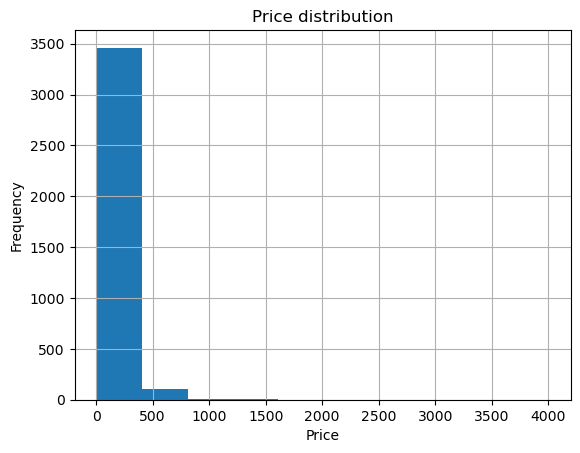

In [37]:
data['price'].plot(kind='hist',grid=True)
plt.title('Price distribution')
plt.xlabel('Price');


As you can see in the Figure, most of the price values are in the lower range of the price spectrum. For better learning, these prices should have a better distribution rather than the skewed distribution that they have now. This is done by taking the logarithm of the price as shown in the following code:

<AxesSubplot:>

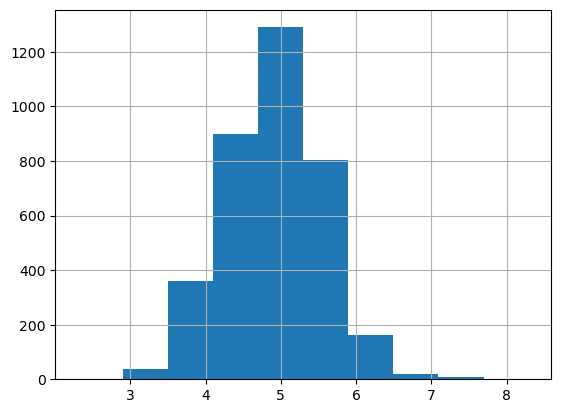

In [38]:
target = np.log(data['price'])
target.hist()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

,property_type,room_type,bathrooms,bedrooms,beds,bed_type,accommodates,host_total_listings_count,number_of_reviews,review_scores_value,neighbourhood_cleansed,cleaning_fee,minimum_nights,host_is_superhost,instant_bookable
2176,Apartment,Entire home/apt,2.0,2.0,2.0,Real Bed,5,307,0,9.168234,Downtown,119.0,2,f,f
177,Townhouse,Private room,1.0,1.0,1.0,Real Bed,2,1,25,10.000000,Jamaica Plain,30.0,2,t,f
829,Apartment,Private room,1.0,1.0,1.0,Real Bed,1,1,3,8.000000,Roxbury,10.0,1,f,f
1106,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,7,0,9.168234,South End,40.0,3,f,t
2872,Townhouse,Private room,1.0,1.0,2.0,Real Bed,2,1,0,9.168234,Dorchester,10.0,4,f,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,6,21,9.000000,South End,45.0,2,t,f
1294,Apartment,Entire home/apt,1.5,2.0,3.0,Real Bed,5,313,15,8.000000,Back Bay,100.0,3,f,f
860,Apartment,Private room,1.0,1.0,1.0,Real Bed,1,17,4,10.000000,Roxbury,50.0,30,f,f
3507,Apartment,Private room,1.0,1.0,1.0,Real Bed,2,3,64,9.000000,Allston,20.0,1,f,f


In [41]:
numeric_column = features.select_dtypes(include=np.number).columns.to_list()
numeric_column

['bathrooms',
 'bedrooms',
 'beds',
 'accommodates',
 'host_total_listings_count',
 'number_of_reviews',
 'review_scores_value',
 'cleaning_fee',
 'minimum_nights']

In [49]:
numeric_features = []
for col in numeric_column:
    numeric_features.append(tf.feature_column.numeric_column(key=col))

In [50]:
numeric_features


[NumericColumn(key='bathrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='beds', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='accommodates', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='host_total_listings_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='number_of_reviews', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='review_scores_value', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cleaning_fee', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='minimum_nights', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [52]:
categorical_column = features.select_dtypes(exclude=np.number).columns.to_list()
categorical_features=[]

for col in categorical_column:
    vocabulary = data[col].unique()
    categorical_features.append(tf.feature_column.categorical_column_with_vocabulary_list(col,vocabulary))
categorical_features

[VocabularyListCategoricalColumn(key='property_type', vocabulary_list=('House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast', 'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm', 'Other', 'Camper/RV'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='room_type', vocabulary_list=('Entire home/apt', 'Private room', 'Shared room'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='bed_type', vocabulary_list=('Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='neighbourhood_cleansed', vocabulary_list=('Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood Medical Area', 'Bay Village', 'Leather District', 'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay', 'East Boston', 'Charlestown', 'West End', 'Beacon Hill', 'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park'

In [53]:
feature  = categorical_features + numeric_features
feature

[VocabularyListCategoricalColumn(key='property_type', vocabulary_list=('House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast', 'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm', 'Other', 'Camper/RV'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='room_type', vocabulary_list=('Entire home/apt', 'Private room', 'Shared room'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='bed_type', vocabulary_list=('Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='neighbourhood_cleansed', vocabulary_list=('Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood Medical Area', 'Bay Village', 'Leather District', 'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay', 'East Boston', 'Charlestown', 'West End', 'Beacon Hill', 'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park'

In [54]:
def input_fn(features,label,training=True,batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),label))
    if training:
        dataset = dataset.shuffle(10000).repeat()
    return dataset.batch(batch_size)

In [57]:
linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature,model_dir='linear_regressor')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'linear_regressor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [58]:
linear_regressor.train(input_fn=lambda:input_fn(x_train,y_train,training=True),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear_regressor/model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into linear_regressor/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 25.98441, step = 0
INFO:tensorflow:global_step/sec: 203.706
INFO:tensorflow:loss = 0.2959278, step = 100 (0.493 sec)
INFO:tensorflow:global_step/sec: 536.97
INFO:tensorflow:loss = 0.31479445, step = 200 (0.186 sec)
INFO:tensorflow:global_step/sec: 640.809
INFO:tensorflow:loss = 0.26128358, step = 300 (0.156 sec)
INFO:tensorflow:global_step/sec: 566.976
INFO:tensorflow:los

In [59]:
linear_regressor.evaluate(input_fn=lambda:input_fn(x_test,y_test,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-04-17T21:32:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear_regressor/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69737s
INFO:tensorflow:Finished evaluation at 2023-04-17-21:32:38
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.17600258, global_step = 2000, label/mean = 4.9370537, loss = 0.17523855, prediction/mean = 4.92954
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: linear_regressor/model.ckpt-2000


{'average_loss': 0.17600258,
 'label/mean': 4.9370537,
 'loss': 0.17523855,
 'prediction/mean': 4.92954,
 'global_step': 2000}

In [60]:
%load_ext tensorboard
%tensorboard --logdir ./linear_regressor